In [12]:
import numpy as np 
import matplotlib.pyplot
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

solves ODEs of the form: 
$a(x)+\frac{\partial^2G}{\partial x^2} + b(x)\frac{\partial G}{\partial x} + c(x)G = d(x)$
with given boundary conditions

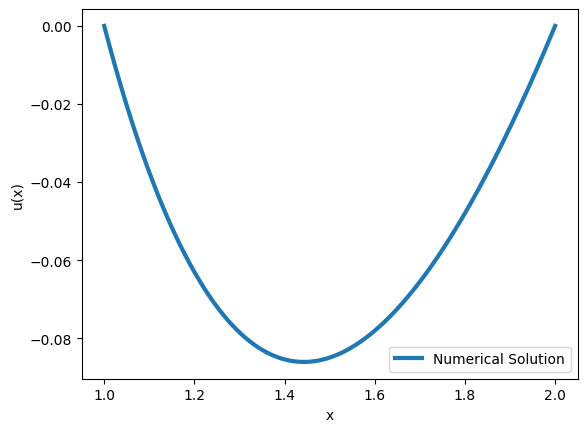

In [13]:


def solve_ode(xs, bc_def, a, b, c, d):
  def solver(xs, G_init): 
    G1, G2 = G_init
    a = xs**2
    b = xs
    c = 0
    d = xs

    dG = G2
    d2G = (d - b * G2 - c * G1) / a
    return np.array([dG, d2G])
  
  G_init = np.zeros((2, xs.size))
  u_numerical = solve_bvp(solver, bc_def, xs, G_init)
  u_plot = u_numerical.sol(xs)[0] # only plot u 

  plt.plot(xs, u_plot, label = rf"Numerical Solution", linewidth = 3)

  #labeling
  plt.xlabel("x")
  plt.ylabel("u(x)")
  plt.legend()
  
if __name__ == "__main__":
  xs = np.linspace(1,2, 1050)
  a = xs**2
  b = xs
  c = np.zeros_like(xs)
  d = xs
  def bcs(Ga, Gb):
    return np.array([Ga[0], Gb[0]])
  
  solve_ode(xs, bcs, a, b, c, d)
